
# 1.Instalação e carga de pacotes necessários

In [1]:
%pip install sentence_transformers


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\lucas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install pandas


You should consider upgrading via the 'c:\Users\lucas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install numpy


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\lucas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install matplotlib


You should consider upgrading via the 'c:\Users\lucas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\lucas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
import sentence_transformers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# 2. Instalação do pacote Ullysses Fetcher para busca do modelo

In [7]:
#instalação do Ulysses Fetcher, para buscar os datasets no Github do projeto
!python -m pip install "git+https://github.com/ulysses-camara/ulysses-fetcher@v0.1.1-beta"
import buscador



  Cloning https://github.com/ulysses-camara/ulysses-fetcher (to revision v0.1.1-beta) to c:\users\lucas\appdata\local\temp\pip-req-build-n_9312ed
  Resolved https://github.com/ulysses-camara/ulysses-fetcher to commit 933107853f4794beb2ffbd99ec4c25437e569aea
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/ulysses-camara/ulysses-fetcher 'C:\Users\lucas\AppData\Local\Temp\pip-req-build-n_9312ed'
  Running command git checkout -q 933107853f4794beb2ffbd99ec4c25437e569aea
You should consider upgrading via the 'c:\Users\lucas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Instalação do modelo de língua disponibilizado pelo buscador

In [8]:
buscador.download_model(
    task_name="sentence_similarity",
    model_name="distil_sbert_br_ctimproved_12_epochs_v1",
)

True

# 3.Carga do Modelo de língua

In [9]:
#Carga dos modelos de Línuga:
Legalbert = sentence_transformers.SentenceTransformer(
    "distil_sbert_br_ctimproved_12_epochs_v1",
    device="cpu",
)

Sbert = sentence_transformers.SentenceTransformer(
    "neuralmind/bert-base-portuguese-cased",
    device="cpu",
)

Legalbert

Some weights of the model checkpoint at C:\Users\lucas/.cache\torch\sentence_transformers\neuralmind_bert-base-portuguese-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [10]:
Sbert

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

# 4. Leitura e tratamento dos datasets

In [11]:
df_2019 = pd.read_csv("Cópia de proposicao-tema-completo-sem-duplicado-2019-all-fields.csv", delimiter=",")
df_2019.dropna(inplace=True)
df_assunto = pd.read_csv("dados-conle-anonimizado - UTF8 - dados-conle-anonimizado - UTF8.csv", delimiter=",")
df_assunto.dropna(inplace=True)

In [12]:
df_2019

,codProposicao,txtNome,txtEmenta,txtExplicacaoEmenta,txtIndexacao,imgArquivoTeorPDF,idTema,txtProposicaoComJustificacao,txtProposicaoSemJustificacao,txtJustificacao,txtEmentaProposicaoSemJustificacao,txtEmentaKeywords,txtEmentaProposicaoSemJustificacaoKeywords
1,317970,PL 2037/2019 ...,"Altera a Lei nº 8.666, de 21 de junho de 1993,...",...,"Alteração, Lei das Licitações, proibição, ante...","PROJETO DE LEI No , DE 2006\r\n(...",34,O CONGRESSO NACIONAL decreta:\r\nArt. 1º A a...,O CONGRESSO NACIONAL decreta:\r\nArt. 1º A a...,JUSTIFICAÇÃO\r\nConsoante investigações promo...,"""Altera a Lei nº 8.666, de 21 de junho de 1993...","""Altera a Lei nº 8.666, de 21 de junho de 1993...","""Altera a Lei nº 8.666, de 21 de junho de 1993..."
2,427339,PL 2439/2019 ...,"Altera o art. 125 da Lei nº 9.279, de 14 de ma...",...,"Alteração, Nova Lei de Patentes, critérios, re...","PROJETO DE LEI No , DE 2009\r\n(Do...",66,O CONGRESSO NACIONAL decreta:\r\nArt. 1º O ar...,O CONGRESSO NACIONAL decreta:\r\nArt. 1º O ar...,JUSTIFICAÇÃO\r\nO antigo Código da Propriedad...,"""Altera o art. 125 da Lei nº 9.279, de 14 de m...","""Altera o art. 125 da Lei nº 9.279, de 14 de m...","""Altera o art. 125 da Lei nº 9.279, de 14 de m..."
3,501638,PL 402/2019 ( ...,Institui o Programa Cidade Amiga do Idoso. ...,...,"Criação, Programa Cidade Amiga do Idoso, quali...","PROJETO DE LEI no , DE 2011 \r\n(Do Sr. ...",44,O CONGRESSO NACIONAL decreta: \r\nArt. 1º Fic...,O CONGRESSO NACIONAL decreta: \r\nArt. 1º Fic...,JUSTIFICAÇÃO \r\nAs pessoas idosas em nosso p...,"""Institui o Programa Cidade Amiga do Idoso. ...","""Institui o Programa Cidade Amiga do Idoso. ...","""Institui o Programa Cidade Amiga do Idoso. ..."
4,512431,PL 2442/2019 ...,Proíbe a utilização de mensagens subliminares ...,"Altera a Lei nº 4.117, de 1962 ...","Alteração, Código Brasileiro de Telecomunicaçõ...",\r\n \r\nCÂMARA DOS DEPUTADOS \r\n \r\nPROJET...,37,O CONGRESSO NACIONAL decreta: \r\n \r\nArt. 1...,O CONGRESSO NACIONAL decreta: \r\n \r\nArt. 1...,JUSTIFICAÇÃO \r\nAs emissoras de radiodifusão...,"""Proíbe a utilização de mensagens subliminares...","""Proíbe a utilização de mensagens subliminares...","""Proíbe a utilização de mensagens subliminares..."
5,530357,PL 2440/2019 ...,Obriga os fabricantes de aparelho celular a di...,...,"Obrigatoriedade, fabricante, assistência técni...","PROJETO DE LEI Nº , DE 2011 \r\n(Da Sra. ...",67,O CONGRESSO NACIONAL decreta: \r\nArt. 1º Est...,O CONGRESSO NACIONAL decreta: \r\nArt. 1º Est...,JUSTIFICAÇÃO \r\nO Código de Defesa do Consum...,"""Obriga os fabricantes de aparelho celular a d...","""Obriga os fabricantes de aparelho celular a d...","""Obriga os fabricantes de aparelho celular a d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2235987,PL 6604/2019 ...,"Altera a Lei 9.504, de 30 de setembro de 1997,...",...,"Alteração, Lei das Eleições (1997), critério, ...","\r\nPROJETO DE LEI Nº , DE 2019 \r\n...",74,O CONGRESSO NACIONAL decreta: \r\nArt. 1º O a...,O CONGRESSO NACIONAL decreta: \r\nArt. 1º O a...,JUSTIFICAÇÃO \r\nAlém de obrigar o voto da pe...,"""Altera a Lei 9.504, de 30 de setembro de 1997...","""Altera a Lei 9.504, de 30 de setembro de 1997...","""Altera a Lei 9.504, de 30 de setembro de 1997..."
5868,2236024,PL 6605/2019 ...,"Altera a lei 9.096/95, de 19 de Setembro de 19...",...,"Alteração, Lei Orgânica dos Partidos Políticos...","PROJETO DE LEI, DE 2019. \r\n(DO SR, DR. GONÇA...",74,O CONGRESSO NACIONAL Decreta: \r\n \r\n Art...,O CONGRESSO NACIONAL Decreta: \r\n \r\n Art...,JUSTIFICAÇÃO \r\n \r\n A Lei dos Partidos P...,"""Altera a lei 9.096/95, de 19 de Setembro de 1...","""Altera a lei 9.096/95, de 19 de Setembro de 1...","""Altera a lei 9.096/95, de 19 de Setembro de 1..."
5871,2236058,PL 6608/2019 ...,"""Institui o Programa de Auxílio à Educação - c...",...,"Criação, Bolsa Educação, transferência de rend...","PROJETO DE LEI, DE 2019. \r\n(DO SR, DR. GONÇA...",44,O CONGRESSO NACIONAL Decreta: \r\n \r\n Art...,O CONGRE

In [13]:
df_assunto

,NÚMERO-PROPOSIÇÃOSILEG,TxtAssunto
0,PL 993/2019,"Solicito reelaboração do PL 10235/2018, para r..."
1,PL 494/2019,projeto de lei para proteger professor de abus...
2,PL 525/2019,Projeto para restabelecer na CLT a proibição d...
3,PL 927/2019,Obriga as instituições e comércios a expor os...
4,PL 947/2019,SOLICITO A FEITURA DE UM PROJETO DE LEI QUE PE...
...,...,...
323,PL 4892/2019,Solicita-se revisão de minuta de projeto de le...
324,PL 4894/2019,Solicito a elaboração do Projeto de Lei para p...
325,PL 4895/2019,FIES O Fundo de Financiamento Estudantil (FIE...
326,PL 4899/2019,Conforme acordado em reunião. Solicito que o a...


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) Transformação da coluna desejada em uma lista para realização do embedding

In [14]:
corpus = df_2019["imgArquivoTeorPDF"].to_list()#Informação a ser recuperada
assunto = df_assunto["TxtAssunto"].to_list()#query

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) Embeddings
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;É importante manter o convert_to_tensor para q a similaridade do coseno seja aplicada para todas as possíveis combinações e não só entre pares de mesmo índice

In [15]:
LB_corpus_embeddings = Legalbert.encode(corpus, convert_to_tensor=True)
LB_assunto_embeddings = Legalbert.encode(assunto, convert_to_tensor=True)
SB_corpus_embeddings = Sbert.encode(corpus, convert_to_tensor=True)
SB_assunto_embeddings = Sbert.encode(assunto, convert_to_tensor=True)

In [16]:
LB_corpus_embeddings

tensor([[-0.4439,  0.2001,  0.9820,  ...,  0.8811,  0.5064, -1.1100],
        [ 0.0875,  0.5138,  1.4369,  ...,  1.2880,  0.8155, -0.4028],
        [-0.1484, -0.1145,  0.8551,  ...,  1.1228,  0.7317, -0.6372],
        ...,
        [-0.4330,  0.6352,  0.5552,  ...,  0.0425,  0.6367, -0.6963],
        [-0.3444,  0.5556,  0.3161,  ...,  0.6431,  1.0358, -0.5214],
        [ 0.1521,  0.3273,  0.8297,  ...,  0.2882,  0.6439, -0.7733]])

In [17]:
LB_corpus_embeddings.shape

torch.Size([3698, 768])

In [18]:
LB_assunto_embeddings

tensor([[-0.0698,  0.6265,  0.5076,  ...,  1.3335,  0.0857, -0.9466],
        [ 0.0720,  0.5920,  0.9814,  ...,  0.4928,  0.4693, -0.1055],
        [-0.4584,  0.3015,  0.2938,  ...,  0.7288,  0.5651, -0.3732],
        ...,
        [ 0.2114,  0.2241,  0.7106,  ...,  0.8874,  0.5363,  0.1850],
        [-0.4006, -0.2026,  0.2947,  ...,  0.8082,  0.5174, -0.7255],
        [-0.4030,  0.5429,  0.7337,  ...,  0.9249,  0.3361, -0.2826]])

In [19]:
LB_assunto_embeddings.shape

torch.Size([307, 768])

# 5. Cálculo da similaridade do Coseno - query x txt

In [20]:
LB_cosine_scores = sentence_transformers.util.cos_sim(LB_assunto_embeddings, LB_corpus_embeddings)
SB_cosine_scores = sentence_transformers.util.cos_sim(SB_assunto_embeddings, SB_corpus_embeddings)
#LBsimilarities = LB_cosine_scores.tolist()[265] #lista dos scores de similaridades para a query n° 256, valor escolhido arbitrariamente.


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) Busca dos pares com maior similaridade entre todos, seguido de uma ordenação decrescente
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Notem que *pairs* é uma ***lista de dicionários*** para possibilitar appends e organizar os pares com os respectivos scores de forma mais legível

In [21]:
LB_pairs = list()

for i in range(len(LB_cosine_scores)):
    pairs1 = list()
    for j in range(len(LB_cosine_scores[0])):
        pairs1.append({'TituloPL': [i,j], 'score': LB_cosine_scores[i][j]})
    LB_pairs.append(pairs1)

SB_pairs = list()
for i in range(len(SB_cosine_scores)):
    pairs1 = list()
    for j in range(len(SB_cosine_scores[0])):
        pairs1.append({'TituloPL': [i,j], 'score': SB_cosine_scores[i][j]})
    SB_pairs.append(pairs1)

In [22]:
from operator import itemgetter
for k in range(len(LB_pairs)):
    LB_pairs[k] = sorted(LB_pairs[k], key=itemgetter('score'), reverse=True)

for k in range(len(SB_pairs)):
    SB_pairs[k] = sorted(SB_pairs[k], key=itemgetter('score'), reverse=True)

# 6. Implementação da API do BM25L + RF para comparação.

In [23]:
#Importando a biblioteca nltk

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

import sklearn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [24]:
#Algoritmo do BM25 Okapi

import math
import numpy as np
from multiprocessing import Pool, cpu_count

"""
All of these algorithms have been taken from the paper:
Trotmam et al, Improvements to BM25 and Language Models Examined
Here we implement all the BM25 variations mentioned. 
"""


class BM25:
    def __init__(self, corpus, tokenizer=None):
        self.corpus_size = len(corpus)
        self.avgdl = 0
        self.doc_freqs = []
        self.idf = {}
        self.doc_len = []
        self.tokenizer = tokenizer
        #Tokenizar o corpus
        if tokenizer:
            corpus = self._tokenize_corpus(corpus)

        nd = self._initialize(corpus)
        self._calc_idf(nd)

    def _initialize(self, corpus):
        nd = {}  # word -> number of documents with word
        num_doc = 0
        for document in corpus:
            self.doc_len.append(len(document))
            num_doc += len(document)

            frequencies = {}
            for word in document:
                if word not in frequencies:
                    frequencies[word] = 0
                frequencies[word] += 1
            self.doc_freqs.append(frequencies)

            for word, freq in frequencies.items():
                try:
                    nd[word] += 1
                except KeyError:
                    nd[word] = 1

        self.avgdl = num_doc / self.corpus_size

        return nd

    def _tokenize_corpus(self, corpus):
        pool = Pool(cpu_count())
        tokenized_corpus = pool.map(self.tokenizer, corpus)
        return tokenized_corpus

    def _calc_idf(self, nd):
        raise NotImplementedError()

    def get_scores(self, query):
        raise NotImplementedError()

    def get_batch_scores(self, query, doc_ids):
        raise NotImplementedError()

    def get_top_n(self, query, documents, n=5):

        assert self.corpus_size == len(documents), "The documents given don't match the index corpus!"

        scores = self.get_scores(query)
        top_n = np.argsort(scores)[::-1][:n]
        return [documents[i] for i in top_n]

    def get_top_n_ngram(self, score, documents, n=5):

        assert self.corpus_size == len(documents), "The documents given don't match the index corpus!"

        pdr = np.zeros(self.corpus_size)
        alpha = 2
        for ps in score:
            pdr = np.add(pdr, alpha * ps)
            alpha -= 1

        top_n = np.argsort(pdr)[::-1][:n]
        return [documents[i] for i in top_n]

    def get_partial_score(self, query, documents):
        assert self.corpus_size == len(documents), "The documents given don't match the index corpus!"

        score = self.get_scores(query)

        return score

    def get_top_n_score(self, scores, documents, n=5):

        assert self.corpus_size == len(documents), "The documents given don't match the index corpus!"

        top_n = np.argsort(scores)[::-1][:n]
        return [documents[i] for i in top_n]

In [25]:
#Implementacao do BM25L - adapta parametros para corrigir a preferencia do Okapi por documentos mais curtos

class BM25L(BM25):
    def __init__(self, corpus, tokenizer=None, k1=2.4, b=0.9, epsilon=0.25):
        self.k1 = k1
        self.b = b
        self.epsilon = epsilon
        super().__init__(corpus, tokenizer)

    #Calculo do IDF (Inverse Document Frequency)
    def _calc_idf(self, nd):
        """
        Calculates frequencies of terms in documents and in corpus.
        This algorithm sets a floor on the idf values to eps * average_idf
        """
        # collect idf sum to calculate an average idf for epsilon value
        idf_sum = 0
        # collect words with negative idf to set them a special epsilon value.
        # idf can be negative if word is contained in more than half of documents
        negative_idfs = []
        for word, freq in nd.items():
            idf = math.log(self.corpus_size + 1) - math.log(freq + 0.5)
            self.idf[word] = idf
            idf_sum += idf
            if idf < 0:
                negative_idfs.append(word)
        self.average_idf = idf_sum / len(self.idf)

        eps = self.epsilon * self.average_idf
        for word in negative_idfs:
            self.idf[word] = eps
    
    #Calculo do ctd
    def get_ctd(self, q_freq, b, doc_len, avg_len):
      ctd = q_freq/(1 - b + b*(doc_len)/(avg_len))
      return ctd

    #Avaliar a pontuacao de todos os documentos na base
    def get_scores(self, query):
        """
        The ATIRE BM25 variant uses an idf function which uses a log(idf) score. To prevent negative idf scores,
        this algorithm also adds a floor to the idf value of epsilon.
        See [Trotman, A., X. Jia, M. Crane, Towards an Efficient and Effective Search Engine] for more info
        :param query:
        :return:
        """
        score = np.zeros(self.corpus_size)
        doc_len = np.array(self.doc_len)

        for q in query:
            q_freq = np.array([(doc.get(q) or 0) for doc in self.doc_freqs])
            ctd = self.get_ctd(q_freq, self.b, doc_len, self.avgdl)
            score += (self.idf.get(q) or 0) * ( (ctd + 0.5) * (self.k1 + 1) /
                                               ( (ctd + 0.5) + self.k1 ))
        return score

    def get_batch_scores(self, query, doc_ids):
        """
        Calculate bm25 scores between query and subset of all docs
        """
        assert all(di < len(self.doc_freqs) for di in doc_ids)
        score = np.zeros(len(doc_ids))
        doc_len = np.array(self.doc_len)[doc_ids]
        for q in query:
            q_freq = np.array([(self.doc_freqs[di].get(q) or 0) for di in doc_ids])
            score += (self.idf.get(q) or 0) * (q_freq * (self.k1 + 1) /
                                               (q_freq + self.k1 * (1 - self.b + self.b * doc_len / self.avgdl)))
        return score.tolist()
        
    def lambda_update(self, scores, lambdas, data):
        """
        Updates bm25 scores using the lambdas values
        """
        data = data[data["imgArquivoTeorPDF"].notna()]
        data.reset_index(inplace=True)

        for i in range(len(data)):
            nome_doc = data["txtNome"][i].strip()
            if nome_doc in lambdas.keys():
                scores[i] += lambdas[nome_doc]

        return scores

    def lambda_calc(self, queries_ds, query, cut, delta):
        """
        Searches for similar queries; returns dictionary
        """
        # CSV treatment
        all_queries = queries_ds["query"].tolist()
        all_queries.append(query)
        lista_doc = [str(q).replace("[", "").replace("]", "").replace('"', '').split(";") for q in
                     queries_ds["documents"]]

        vectorizer = TfidfVectorizer()
        vectorizer.fit(all_queries)
        vsm_2 = vectorizer.transform(queries_ds["query"].tolist())
        vsm_1 = vectorizer.transform([query])
        similarities = cosine_similarity(vsm_1, vsm_2).tolist()[0]

        doc_sim = [(lista_doc[j], similarities[j]) for j in range(len(similarities)) if similarities[j] > cut]

        dic = {}
        for tuple in doc_sim:
            for doc in tuple[0]:
                l = doc.split(",")
                if l[0] in dic:
                    dic[l[0].strip().replace("'", "")] += float(l[2]) * float(tuple[1])
                else:
                    dic[l[0].strip().replace("'", "")] = float(l[2]) * float(tuple[1])  # calculando a soma do produto sim*score

        for key in dic:
            dic[key] = np.log(dic[key] + 1) * delta
        return dic


In [26]:
# carregando corpus

# Selecting list of documents to be read
input_file = "Cópia de proposicao-tema-completo-sem-duplicado-2019-all-fields.csv"      # must be replaced with a file containing the corpus
df = pd.read_csv(input_file, encoding="utf-8")

In [27]:
data = df.imgArquivoTeorPDF.dropna()        # Trocar com nome da coluna desejada
data = data.to_numpy()

In [28]:
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
from unicodedata import normalize
from nltk.stem import RSLPStemmer
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer

# Remove os acentos de uma string
def _remove_acentos(txt):
    return normalize('NFKD', txt).encode('ASCII', 'ignore').decode('ASCII')

# Remoção de stopwords + acentuação
def preprocess2(txt):
    txt = _remove_acentos(txt)
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))
    
    # terms = word_tokenize(txt.lower())
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [word for word in terms if word not in stopwords]

    return terms

# Remoção de stopwords + acentuação + steming
def preprocess3(txt):
    txt = _remove_acentos(txt)
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))

    stemmer = RSLPStemmer()
    # terms = word_tokenize(txt.lower())
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [stemmer.stem(word) for word in terms if word not in stopwords]
    return terms

# Remoção de stopwords + acentuação + n-gram
def preprocess_ngram(txt, n):
    txt = _remove_acentos(txt)
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))

    # terms = word_tokenize(txt.lower())
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [word for word in terms if word not in stopwords]

    ngram = list(ngrams(terms, n))

    return ngram

# Remoção de stopwords + acentuação + steming + n-gram
def preprocess_ngram_stem(txt, n):
    txt = _remove_acentos(txt)
    stopwords = nltk.corpus.stopwords.words("portuguese")
    stopwords.extend(list(punctuation))

    stemmer = RSLPStemmer()
    # terms = word_tokenize(txt.lower())
    tokenizer = RegexpTokenizer('\w+')
    terms = tokenizer.tokenize(txt.lower())
    terms = [stemmer.stem(word) for word in terms if word not in stopwords]

    ngram = list(ngrams(terms, n))

    return ngram

In [29]:
tokenized_corpus3 = [preprocess3(doc) for doc in data]                      #Stopwords + Acentuação + Stemming

In [30]:
bm25L = BM25L(tokenized_corpus3)              #Stopwords + Acentuação + Stemming

In [31]:
# Pesquisando por assuntos
df_assunto = pd.read_csv("dados-conle-anonimizado - UTF8 - dados-conle-anonimizado - UTF8.csv", delimiter=',', encoding="utf-8")
df_assunto.dropna(inplace=True)

In [32]:
# Obtem o nome do texto no df
def get_name(df, doc):
    return str(df[df.imgArquivoTeorPDF==doc].txtNome.to_numpy()[0]).strip()


In [33]:
# Modificar pra nova base
arr_assunto = df_assunto.to_numpy()
y,X = arr_assunto[:,0],arr_assunto[:,1]
y = [i.strip() for i in y]

In [34]:
base_feedback = pd.read_csv('Cópia de base-feedback-nosso.csv', delimiter=';', encoding="latin1")

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

labels_old = list()
labels_new = list()
labels_Sbert = list()
labels_Lbert = list()
l_v = list()

for l, x in zip(y, X):
    tokenized_query = preprocess3(x)  # Stopwords + Acentuação + Stemming

    # Stopwords + Acentuação + Stemming + Unigram + Bigram (L)
    scores_stem_l = list()

    # Cálculo dos lambdas para a query
    lambdas = bm25L.lambda_calc(base_feedback, x, cut=0.6, delta=0.7)

    # Processo normal do BM25
    scores = bm25L.get_partial_score(tokenized_query, data)
    scores_norm = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

    top_n_old = bm25L.get_top_n_score(scores_norm, data, n=20)
    label_old = [get_name(df, d) for d in top_n_old]

    # Cálculo dos novos scores; seleção dos n documentos com base nos scores novos
    new_scores = bm25L.lambda_update(scores_norm, lambdas, df)
    top_n_new = bm25L.get_top_n_score(new_scores, data, n=20)
    label_new = [get_name(df, d) for d in top_n_new]

    

    # Adicionar os resultados da query as listas

    labels_old.append(label_old)
    labels_new.append(label_new)
    # Adicionar resposta esperada a lista
    l_v.append(l)


# 7. A partir daqui seguem as avaliações de recall dos modelos.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Seguindo uma lógica semelhante à da API do BM25 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; O primeiro passo é a criação de uma lista com o "nome" dos N textos melhor ranqueados na etapa de IR. Essa lista é, depois, utilizada para a avaliação.

In [36]:
def bert_get_name(pairs, n):
    labels_bert = list()
    for j in range(len(pairs)):
        labels = list()
        for i in range(n):
            labels.append(str(df_2019.iloc[pairs[j][i]['TituloPL'][1]].txtNome).strip())
        
        labels_bert.append(labels)
    return labels_bert    

In [37]:
# Cálculo e adição dos scores do BERT
labels_Lbert = bert_get_name(LB_pairs,21)
labels_Sbert = bert_get_name(SB_pairs,21)

In [38]:
res_old = list()
res_new = list()
res_Sbert = list()
res_Lbert = list()
for k in range(1, 21):

    result_old = list()
    result_new = list()
    result_Sbert = list()
    result_Lbert = list()
    for i in range(len(l_v)):
            
        if (l_v[i] in labels_old[i][:k]):
            result_old.append(1)
        else:
            result_old.append(0)

        if (l_v[i] in labels_new[i][:k]):
            result_new.append(1)
        else:
            result_new.append(0)

        if (l_v[i] in labels_Sbert[i][:k]):
            result_Sbert.append(1)
        else:
            result_Sbert.append(0)

        if (l_v[i] in labels_Lbert[i][:k]):
            result_Lbert.append(1)
        else:
            result_Lbert.append(0)

    res_old.append(sum(result_old)/len(result_old))
    res_new.append(sum(result_new)/len(result_new))
    res_Sbert.append(sum(result_Sbert)/len(result_Sbert))
    res_Lbert.append(sum(result_Lbert)/len(result_Lbert))

In [39]:
'''
Exibe a acuracia do algoritmo
'''


print("BM25L")
print(f"Quantidade encontrada: {sum(result_old)}")
print(f"Quantidade total: {len(arr_assunto)}")
print(f"Acurácia 10 docs: {res_old[9]}")
print(f"Acurácia 20 docs: {res_old[-1]}\n\n")

print("BM25L + LAMBDA")
print(f"Quantidade encontrada: {sum(result_new)}")
print(f"Quantidade total: {len(arr_assunto)}")
print(f"Acurácia 10 docs: {res_new[9]}")
print(f"Acurácia 20 docs: {res_new[-1]}\n\n")

print("SBert")
print(f"Quantidade encontrada: {sum(result_Sbert)}")
print(f"Quantidade total: {len(arr_assunto)}")
print(f"Acurácia 10 docs: {res_Sbert[9]}")
print(f"Acurácia 20 docs: {res_Sbert[-1]}\n\n")

print("LBert")
print(f"Quantidade encontrada: {sum(result_Lbert)}")
print(f"Quantidade total: {len(arr_assunto)}")
print(f"Acurácia 10 docs: {res_Lbert[9]}")
print(f"Acurácia 20 docs: {res_Lbert[-1]}\n\n")

BM25L
Quantidade encontrada: 239
Quantidade total: 307
Acurácia 10 docs: 0.7687296416938111
Acurácia 20 docs: 0.7785016286644951


BM25L + LAMBDA
Quantidade encontrada: 239
Quantidade total: 307
Acurácia 10 docs: 0.7687296416938111
Acurácia 20 docs: 0.7785016286644951


SBert
Quantidade encontrada: 74
Quantidade total: 307
Acurácia 10 docs: 0.22149837133550487
Acurácia 20 docs: 0.24104234527687296


LBert
Quantidade encontrada: 92
Quantidade total: 307
Acurácia 10 docs: 0.23127035830618892
Acurácia 20 docs: 0.2996742671009772




# 8. Geração de gráficos para visualização dos resultados.

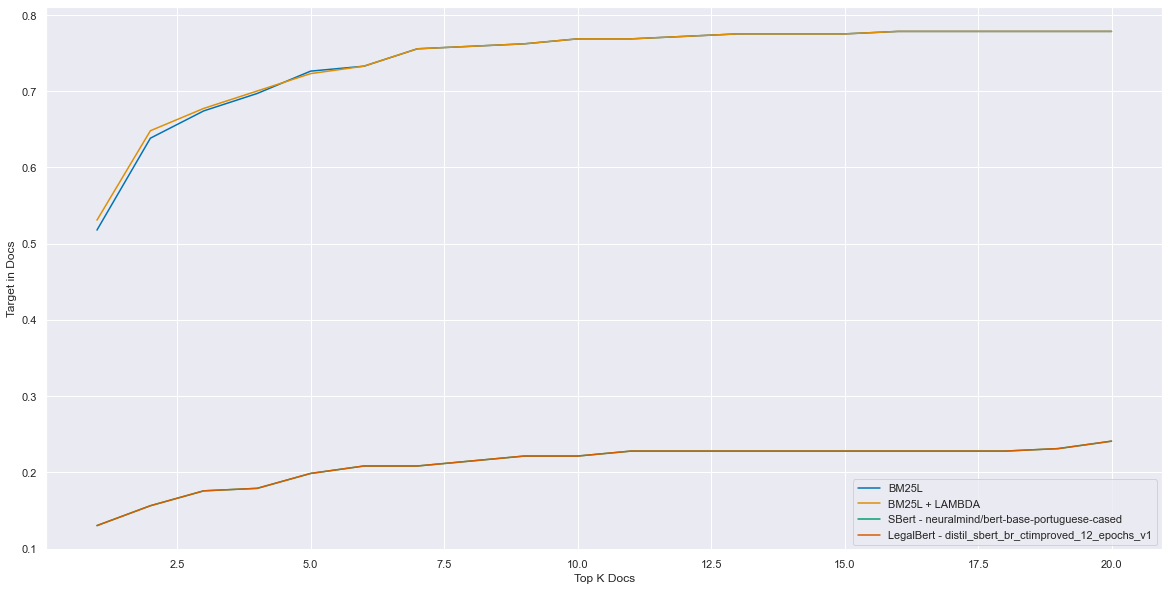

In [41]:
sns.set(palette='colorblind')

plt.figure(figsize=(20,10))
plt.plot(np.arange(1,21), res_old, label="BM25L")
plt.plot(np.arange(1,21), res_new, label="BM25L + LAMBDA")
plt.plot(np.arange(1,21), res_Sbert, label="SBert - neuralmind/bert-base-portuguese-cased")
plt.plot(np.arange(1,21), res_Sbert, label="LegalBert - distil_sbert_br_ctimproved_12_epochs_v1")

plt.title("")
plt.legend()
plt.ylabel("Target in Docs")
plt.xlabel("Top K Docs")
plt.show()


# 9. Conclusão
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A performance do LegalBert é muito inferior à do BM25. É de conhecimento que das 307 queries restantes no dataset dos dados conle após a deleção dos campos nulos, 36 delas não estão presentes no dataset de proposições. Ainda assim, os resultados obtidos após alguns testes ainda apontam com consistência a superioridade do BM25 para o microsserviço em questão.